## Bilder & Klassenverteilung

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import random
from torch.utils.data import DataLoader
from medmnist import TissueMNIST, PathMNIST, INFO
from torchvision import transforms as T
from collections import Counter

In [11]:
train_tf = T.Compose([T.ToTensor()])
train_set =  TissueMNIST(split="train", download=True, transform=train_tf, as_rgb=True)

info = INFO["tissuemnist"]
class_names = list(info["label"].values())
num_classes = len(class_names)

train_set

Dataset TissueMNIST of size 28 (tissuemnist)
    Number of datapoints: 165466
    Root location: C:\Users\nikzh\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slices and resize them into 28×28 gray-scale images

## TissueMNIST

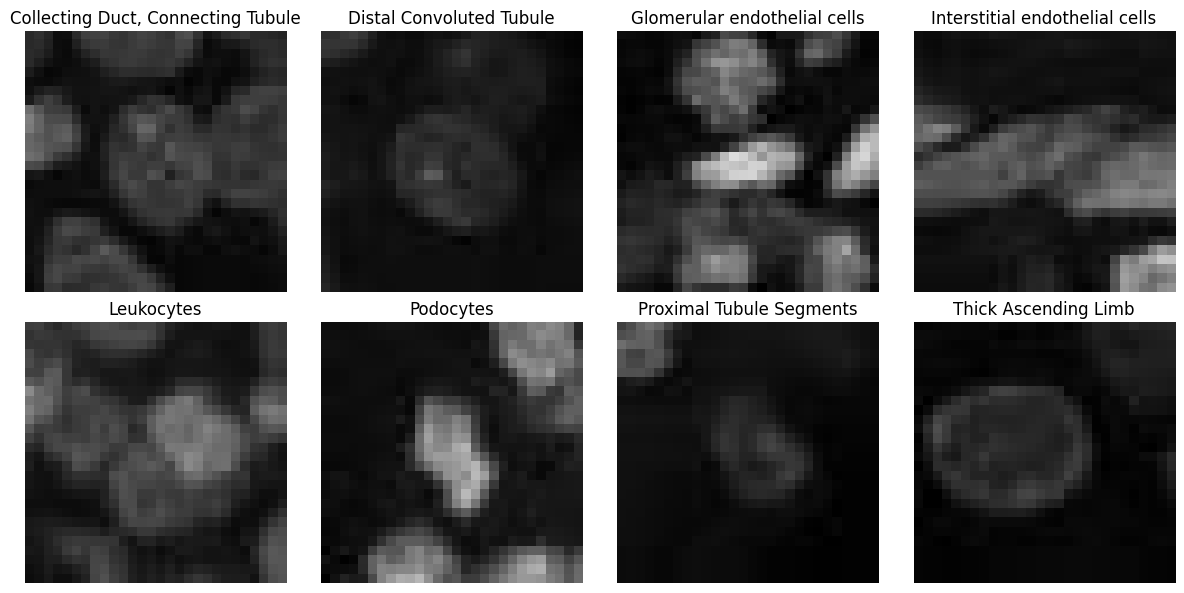

In [ ]:
# Pro Klasse ein Beispielbild sammeln
samples = {}
for img, label in train_set:
    lbl = label.item()
    if lbl not in samples:
        samples[lbl] = img
    if len(samples) == num_classes:
        break

# Plotten
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, lbl in enumerate(sorted(samples.keys())):
    img = samples[lbl]
    ax = axes[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(f"{class_names[lbl]}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
#plt.savefig("tissuemnist_classes.pdf", format="pdf", dpi=300, bbox_inches="tight") 
plt.show()

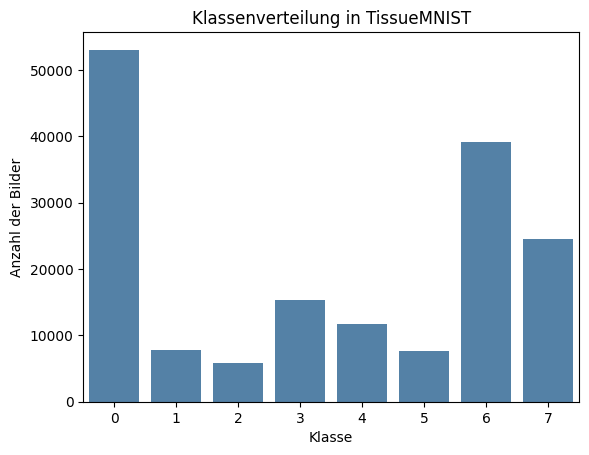

In [13]:
labels = [train_set[i][1].item() for i in range(len(train_set))]
counts = Counter(labels)
sns.barplot(x=list(counts.keys()), y=list(counts.values()), color="steelblue")
plt.title("Klassenverteilung in TissueMNIST")
plt.xlabel("Klasse")
plt.ylabel("Anzahl der Bilder")
plt.show()

In [14]:
print("Bildform:", train_set[0][0].shape)

Bildform: torch.Size([3, 28, 28])


## PathMNIST

In [2]:
info = INFO["pathmnist"]
n_classes = len(info["label"])
class_names = [str(k) for k in range(n_classes)] 
n_channels = info["n_channels"]
as_rgb = (n_channels == 3)
mean = [0.5] * n_channels
std  = [0.5] * n_channels
img_size = 64

train_tf = T.Compose([
    T.Resize((img_size, img_size)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    T.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
    T.ToTensor(),
    T.Normalize(mean, std),
])
train_set =  PathMNIST(split="train", download=True, transform=train_tf, as_rgb=True)

info = INFO["pathmnist"]
class_names = list(info["label"].values())
num_classes = len(class_names)

train_set

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: C:\Users\nikzh\.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CR

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.45882356].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.37254906].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..0.6392157].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..0.69411767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.54509807].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.654902].
Clip

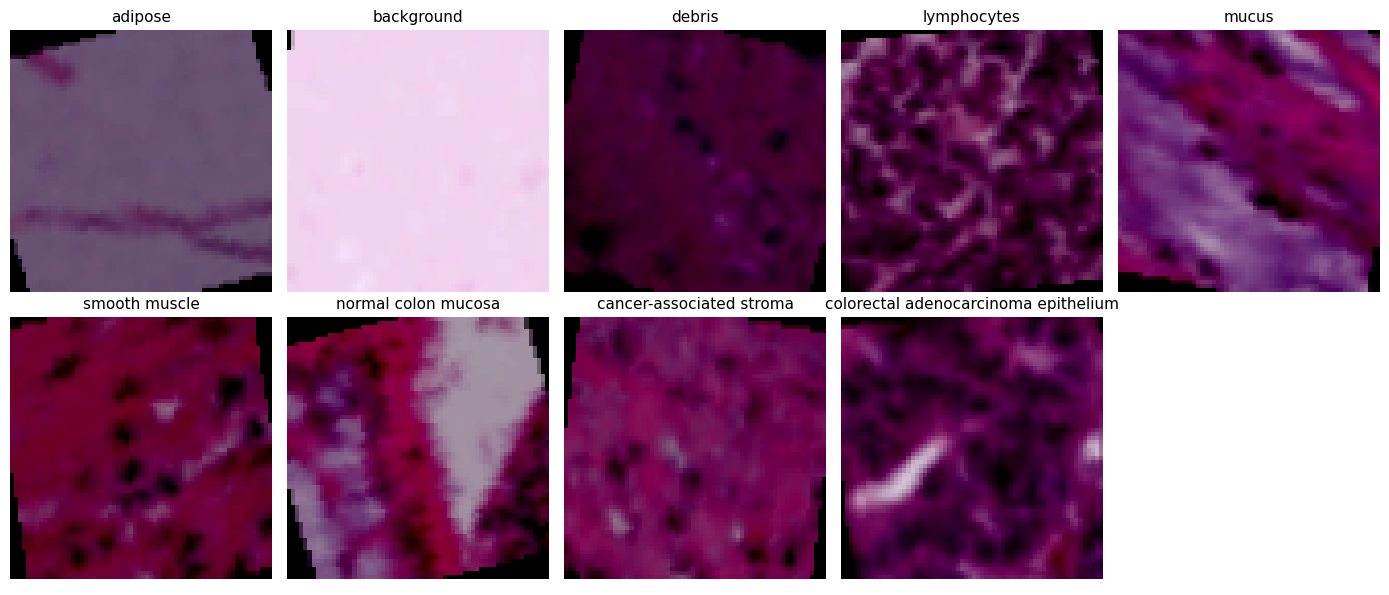

In [ ]:
# Ein Beispiel pro Klasse sammeln
samples = {}
for img, label in train_set:
    lbl = label.item()
    if lbl not in samples:
        samples[lbl] = img
    if len(samples) == num_classes:
        break

# --- Plot in zwei Reihen: 5 Bilder oben, 4 unten ---
rows = 2
cols_first_row = 5
cols_second_row = num_classes - cols_first_row  # 4

fig, axes = plt.subplots(rows, cols_first_row, figsize=(14, 6))


axes = axes.flatten()

for i, lbl in enumerate(sorted(samples.keys())):
    img = samples[lbl]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(class_names[lbl], fontsize=11)
    axes[i].axis("off")

for j in range(num_classes, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
#plt.savefig("pathmnist_classes.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()

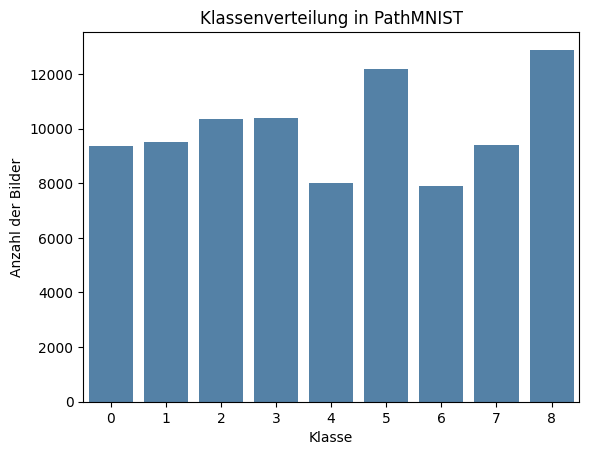

In [17]:
labels = [train_set[i][1].item() for i in range(len(train_set))]
counts = Counter(labels)
sns.barplot(x=list(counts.keys()), y=list(counts.values()), color="steelblue")
plt.title("Klassenverteilung in PathMNIST")
plt.xlabel("Klasse")
plt.ylabel("Anzahl der Bilder")
plt.show()

In [18]:
print("Bildform:", train_set[0][0].shape)

Bildform: torch.Size([3, 28, 28])
